In [ ]:
# importing the librarires
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
# load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# One-Hot encoding our categorial values sex,smoker and region
one_hot_encoded_df = pd.get_dummies(df)
one_hot_encoded_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
X = one_hot_encoded_df.drop("charges",1)
X.columns


Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
y = one_hot_encoded_df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
tf.random.set_seed(42)

# Creating our model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1),
],name="Insurance_Model")

# Compiling our model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics="mae")
# Fitting our model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 953us/step - loss: 13342.9727 - mae: 13342.9727
Epoch 2/100
34/34 [==============================] - 0s 920us/step - loss: 13329.9717 - mae: 13329.9717
Epoch 3/100
34/34 [==============================] - 0s 964us/step - loss: 13315.9346 - mae: 13315.9346
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13300.0146 - mae: 13300.0146
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13281.5713 - mae: 13281.5713
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13260.0322 - mae: 13260.0322
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13235.2822 - mae: 13235.2822
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13207.1514 - mae: 13207.1514
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 13175.4482 - mae: 13175.4482
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 13

In [ ]:
# Checking the model on test dataset
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7539.9517 - mae: 7539.9517


[7539.95166015625, 7539.95166015625]

# Creating different models to test which works best

In [ ]:
tf.random.set_seed(42)

# Creating our model
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1),
])

# Compiling our model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fitting our model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

In [ ]:
model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
# Model 1 trained for longer
tf.random.set_seed(42)

# Creating our model
model_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1),
])

# Compiling our model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fitting our model
history = model_2.fit(X_train,y_train,epochs=200)

model_2.evaluate(X_test,y_test)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'Epoch')

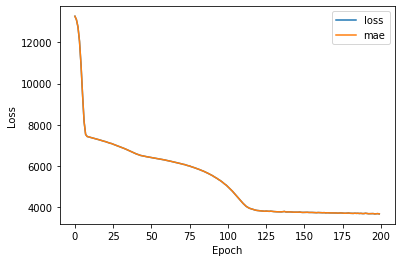

In [ ]:
# Visualizing the progress :: Loss curve / Training Curve

pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
# Make Column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
    )
# Create our new X & y
X = df.drop("charges",1)
y = df["charges"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
# Fit the column transformer with our training data
ct.fit(X_train)
# Transform traning and test data
X_train_normalized=ct.transform(X_train)
X_test_normalized=ct.transform(X_test)




In [ ]:
# Model 1 trained for longer
tf.random.set_seed(42)

# Creating our model
model_3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1),
])

# Compiling our model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fitting our model
history = model_3.fit(X_train_normalized,y_train,epochs=1000)

model_3.evaluate(X_test_normalized,y_test)

Epoch 1/1000
34/34 [==============================] - 0s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/1000
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/1000
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/1000
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/1000
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/1000
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/1000
34/34 [==============================] - 0s 1ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss

[3161.0361328125, 3161.0361328125]